# Source Identification using 2 Class of image

In [72]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
# matplotlib.pyplot as plt

## Understanding Data 

In [2]:
sony=pd.read_csv("Sony_NONIQM.csv")
sony.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12
0,115.494277,118.689980,107.021697,1.109027,1.027670,0.926641,20554,16016,19812,0.986202,0.982513,0.970420
1,125.036287,126.017584,126.640565,0.995081,1.007848,1.012831,-1097190,-1068678,-753861,0.992517,0.984211,0.974200
2,109.158400,106.371291,104.290264,1.019954,0.974467,0.955403,157,641,-3146,0.944636,0.975875,0.884661
3,104.988163,106.860380,103.361314,1.033853,1.017833,0.984504,-960504,-906289,-1375190,0.965784,0.956338,0.969469
4,113.079897,110.401673,112.352422,0.982637,0.976316,0.993567,36,116,26,0.950213,0.989005,0.941654


In [3]:
nikon=pd.read_csv("Nikons_NONIQM.csv")
nikon.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12
0,97.951231,114.860936,103.538871,1.109351,1.172634,1.057045,9676,254,-516994,0.968532,0.963857,0.939107
1,82.120542,86.202934,88.857537,0.970125,1.049712,1.082038,-291807,-89160,-125413,0.994738,0.985885,0.976739
2,101.457712,98.425341,94.363134,1.043049,0.970112,0.930074,-5495,-6447,-212600,0.947254,0.966433,0.885309
3,73.231500,80.030684,75.898656,1.054441,1.092845,1.036421,-177400,-117327,-33797,0.974170,0.964175,0.968974
4,110.222422,108.965243,109.129455,0.998495,0.988594,0.990084,4,0,1028,0.963506,0.988593,0.955920


In [4]:
nikon.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,104.400474,102.449755,83.028615,1.262889,0.985042,0.794795,-48216.027972,-40074.027972,-414226.671329,0.936771,0.916615,0.874342
std,15.333034,14.769326,17.723072,0.192459,0.077344,0.118957,95803.487004,93535.805131,444553.455245,0.031110,0.049967,0.058626
min,69.989225,71.055210,43.971291,0.970125,0.705056,0.517191,-682936.000000,-713971.000000,-2929668.000000,0.799645,0.747724,0.647242
25%,92.018164,90.881465,70.046799,1.119564,0.938509,0.734978,-54156.000000,-32661.500000,-588861.500000,0.917592,0.879845,0.839858
50%,103.684004,101.473963,80.458241,1.231547,0.988594,0.786196,-8461.000000,-4369.000000,-275472.000000,0.940368,0.924702,0.882052
75%,115.670854,113.049906,96.853584,1.355802,1.034400,0.869808,-275.500000,-36.000000,-116740.500000,0.957857,0.958555,0.918374
max,134.770619,142.746826,125.387513,2.023276,1.172634,1.115839,77057.000000,34101.000000,4211.000000,0.994738,0.988593,0.977311


In [5]:
sony.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,123.557707,116.188150,96.451502,1.223853,0.942704,0.778688,-95300.678322,-96797.258741,-130597.531469,0.959617,0.945314,0.907766
std,18.822929,17.667871,19.815824,0.132065,0.062467,0.096439,209345.665738,217025.242637,283643.788328,0.019017,0.030294,0.039582
min,76.623373,70.036950,43.144772,0.982637,0.693622,0.531303,-1097190.000000,-1068678.000000,-1438506.000000,0.903114,0.852878,0.788012
25%,108.885992,103.935742,81.573111,1.117955,0.907530,0.710159,-68555.500000,-61730.500000,-100111.500000,0.948061,0.925182,0.884185
50%,125.426964,115.696645,95.815756,1.215128,0.946639,0.761500,-12726.000000,-7372.000000,-7243.000000,0.960541,0.948511,0.910731
75%,139.134733,129.875542,109.284643,1.312486,0.987174,0.838387,-80.500000,0.500000,1214.000000,0.972813,0.970012,0.938886
max,165.299209,158.571943,153.901957,1.623301,1.079543,1.047750,20554.000000,16016.000000,300199.000000,0.992517,0.992245,0.987060


# Create trainig and testing data Frame

### Add Label Coloumn

In [6]:
sony.loc[:,'label'] = pd.Series(0, index=sony.index)

In [7]:
sony.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,label
0,115.494277,118.689980,107.021697,1.109027,1.027670,0.926641,20554,16016,19812,0.986202,0.982513,0.970420,0
1,125.036287,126.017584,126.640565,0.995081,1.007848,1.012831,-1097190,-1068678,-753861,0.992517,0.984211,0.974200,0
2,109.158400,106.371291,104.290264,1.019954,0.974467,0.955403,157,641,-3146,0.944636,0.975875,0.884661,0
3,104.988163,106.860380,103.361314,1.033853,1.017833,0.984504,-960504,-906289,-1375190,0.965784,0.956338,0.969469,0
4,113.079897,110.401673,112.352422,0.982637,0.976316,0.993567,36,116,26,0.950213,0.989005,0.941654,0


In [8]:
nikon.loc[:,'label'] = pd.Series(1, index=nikon.index)
nikon.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,label
0,97.951231,114.860936,103.538871,1.109351,1.172634,1.057045,9676,254,-516994,0.968532,0.963857,0.939107,1
1,82.120542,86.202934,88.857537,0.970125,1.049712,1.082038,-291807,-89160,-125413,0.994738,0.985885,0.976739,1
2,101.457712,98.425341,94.363134,1.043049,0.970112,0.930074,-5495,-6447,-212600,0.947254,0.966433,0.885309,1
3,73.231500,80.030684,75.898656,1.054441,1.092845,1.036421,-177400,-117327,-33797,0.974170,0.964175,0.968974,1
4,110.222422,108.965243,109.129455,0.998495,0.988594,0.990084,4,0,1028,0.963506,0.988593,0.955920,1


## Join Both data set & Normalise

In [9]:
data=pd.concat([sony,nikon])
data[140:148]

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,label
140,135.592377,131.483976,126.914910,1.036001,0.969700,0.936003,-533,-39,1307,0.985504,0.987399,0.962560,0
141,133.704547,132.011645,127.193292,1.037882,0.987338,0.951301,-982,-96,472,0.974443,0.978474,0.938842,0
142,143.103316,140.935032,136.870137,1.029699,0.984848,0.956443,-108411,-69241,-5589,0.979533,0.973383,0.950241,0
0,97.951231,114.860936,103.538871,1.109351,1.172634,1.057045,9676,254,-516994,0.968532,0.963857,0.939107,1
1,82.120542,86.202934,88.857537,0.970125,1.049712,1.082038,-291807,-89160,-125413,0.994738,0.985885,0.976739,1
2,101.457712,98.425341,94.363134,1.043049,0.970112,0.930074,-5495,-6447,-212600,0.947254,0.966433,0.885309,1
3,73.231500,80.030684,75.898656,1.054441,1.092845,1.036421,-177400,-117327,-33797,0.974170,0.964175,0.968974,1
4,110.222422,108.965243,109.129455,0.998495,0.988594,0.990084,4,0,1028,0.963506,0.988593,0.955920,1


In [10]:
#select all coulomn except label
data[1:3].loc[:,data.columns != 'label']

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12
1,125.036287,126.017584,126.640565,0.995081,1.007848,1.012831,-1097190,-1068678,-753861,0.992517,0.984211,0.974200
2,109.158400,106.371291,104.290264,1.019954,0.974467,0.955403,157,641,-3146,0.944636,0.975875,0.884661


In [11]:
Norm_feature=normalize(data.loc[:,data.columns != 'label'], norm='l2', axis=1, copy=True)

In [12]:
Norm_feature

array([[  3.52823583e-03,   3.62586141e-03,   3.26940692e-03, ...,
          3.01275055e-05,   3.00148129e-05,   2.96453648e-05],
       [  7.32446682e-05,   7.38194998e-05,   7.41844344e-05, ...,
          5.81403910e-07,   5.76538359e-07,   5.70674174e-07],
       [  3.39024810e-02,   3.30368593e-02,   3.23905326e-02, ...,
          2.93385469e-04,   3.03087691e-04,   2.74758635e-04],
       ..., 
       [  4.36099705e-04,   4.24614258e-04,   4.01317458e-04, ...,
          3.55435779e-06,   3.55703070e-06,   3.42947537e-06],
       [  4.87460414e-04,   5.01475208e-04,   4.82155777e-04, ...,
          4.23647775e-06,   4.26887807e-06,   4.04420111e-06],
       [  1.74080612e-04,   1.81601297e-04,   1.78560484e-04, ...,
          1.70667166e-06,   1.69572507e-06,   1.63680092e-06]])

# Create train and test

In [13]:
#concatenate numpy array

#training Set
train_x=np.concatenate((Norm_feature[15:144], Norm_feature[160:]), axis=0)
train_y=np.concatenate((np.array(data[15:144].loc[:,"label"]),np.array(data[160:].loc[:,"label"])),axis=0)

#Testing Set
test_x=np.concatenate((Norm_feature[0:15], Norm_feature[144:160]), axis=0)
test_y=np.concatenate((np.array(data[0:15].loc[:,"label"]),np.array(data[144:160].loc[:,"label"])),axis=0)


# SVM Classifier

In [14]:
# clsf = classifier
clsf=SVC(kernel='rbf',gamma=10,C=1) #SVM Classier
svm={} #store accuracy data for plotting

In [15]:
#training
clsf.fit(train_x, train_y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Testing accuracy on training data

In [16]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clsf.predict(train_x)
svm["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',svm["trainig_set"],'%'

Accuracy Check  82.7450980392 %


### Testing accuracy on Testing data

In [17]:
prediction = clsf.predict(test_x)
svm["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',svm["test_set"],'%'

Accuracy Check  74.1935483871 %


In [18]:
svm

{'test_set': 74.193548387096769, 'trainig_set': 82.745098039215677}

# Decision Tree Classifier

In [2]:
decision={}
clf=DecisionTreeClassifier(max_depth=10,min_samples_split=4)
clf

NameError: name 'DecisionTreeClassifier' is not defined

In [20]:
#train
clf = clf.fit(train_x, train_y)

### Testing accuracy on training data

In [21]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clf.predict(train_x)
decision["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',decision["trainig_set"],'%'

Accuracy Check  98.0392156863 %


### Testing accuracy on Testing data

In [22]:
prediction = clf.predict(test_x)
decision["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',decision["test_set"],'%'

Accuracy Check  80.6451612903 %


In [23]:
decision

{'test_set': 80.645161290322577, 'trainig_set': 98.039215686274503}

# K-mean Clustering 

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmean={}
clust=KMeans(n_clusters=2,n_init=1)
clust

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [26]:
clust.fit(train_x)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [27]:
def accuraccy(pred,expected):
    #calculate positive and negative prediction
    pos=0
    for i in pred:
        if i==expected:
            pos+=1
    return pos
        

### Testing accuracy on training data

In [28]:
#defining class then cheking class
expected=clust.predict(train_x[0].reshape(1,12))[0]
pos=accuraccy(clust.predict(train_x[:128]),expected)

expected2=clust.predict(train_x[-1].reshape(1,12))[0]
if expected2==expected:
    expected2=clust.predict(train_x[-5].reshape(1,12))[0]
    if expected2==expected:
        print "Error in class , fix it mannually"
else:
    pos+=accuraccy(clust.predict(train_x[128:]),expected2)
kmean["trainig_set"]=(pos/float(len(train_y)))*100
print 'Accuracy Check ',kmean["trainig_set"],'%'

Accuracy Check  67.8431372549 %


### Testing accuracy on testing data

In [29]:
#defining class then cheking class
expected=clust.predict(test_x[0].reshape(1,12))[0]
pos=accuraccy(clust.predict(test_x[:15]),expected)

expected2=clust.predict(test_x[-1].reshape(1,12))[0]
if expected2==expected:
    expected2=clust.predict(train_x[-5].reshape(1,12))[0]
    if expected2==expected:
        print "Error in class , fix it mannually"
else:
    pos+=accuraccy(clust.predict(train_x[144:160]),expected2)
kmean["test_set"]=(pos/float(len(test_y)))*100
print 'Accuracy Check ',kmean["test_set"],'%'

Accuracy Check  67.7419354839 %


In [30]:
kmean

{'test_set': 67.74193548387096, 'trainig_set': 67.84313725490196}

# Neural Net Regressor

<ul>
<li>Uses Backpropagation for trainig</li>
<li></li>
</ul>

In [38]:
from sklearn.neural_network import MLPClassifier

In [63]:
neural=dict()
clf = MLPClassifier(algorithm='l-bfgs',hidden_layer_sizes=(50,), alpha=1e-5, random_state=1)
clf

MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=1e-05,
       batch_size=200, beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [64]:
#trainig Network
clf.fit(train_x, train_y)

MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=1e-05,
       batch_size=200, beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Testing accuracy on training data

In [65]:
#Now testing for trainig data
#Now predict values for given classifier
prediction = clf.predict(train_x)
neural["trainig_set"]=accuracy_score(prediction,train_y)*100
print 'Accuracy Check ',neural["trainig_set"],'%'

Accuracy Check  88.6274509804 %


### Testing accuracy on testing data

In [66]:
prediction = clf.predict(test_x)
neural["test_set"]=accuracy_score(prediction,test_y)*100
print 'Accuracy Check ',neural["test_set"],'%'

Accuracy Check  80.6451612903 %


In [67]:
neural

{'test_set': 80.645161290322577, 'trainig_set': 88.627450980392155}

## Ploting

In [76]:
import pylab as plt
plt.rcParams['figure.figsize'] = 16, 12

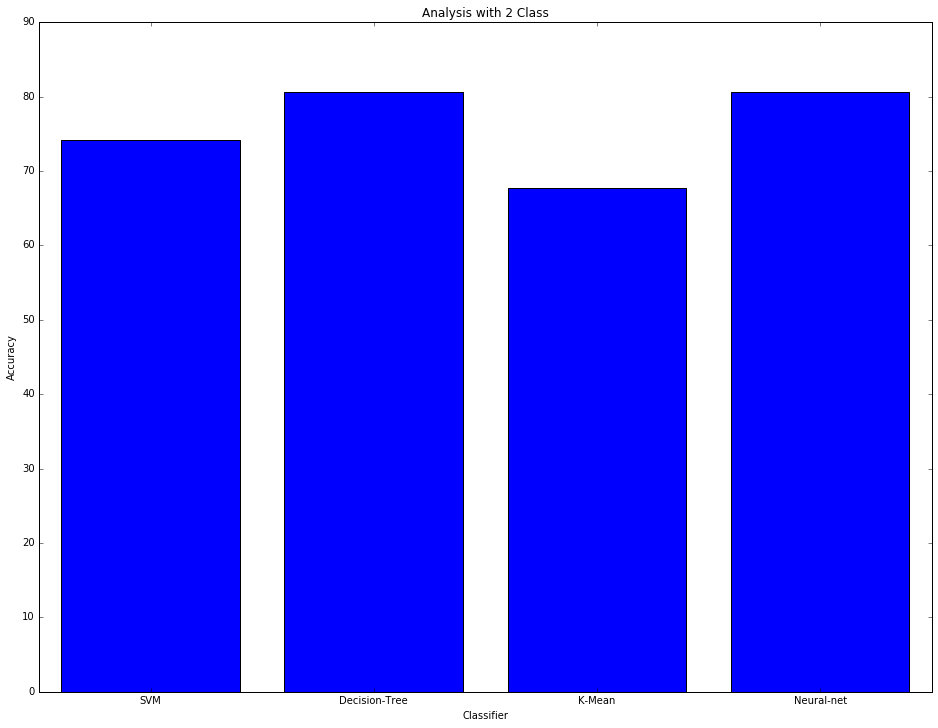

In [77]:
#%pylab inline
classifier = [1,2,3,4]
accuracy_test_data=[svm["test_set"],decision["test_set"],kmean["test_set"],neural["test_set"]]
LABELS=["SVM","Decision-Tree","K-Mean","Neural-net"]

plt.bar(classifier,accuracy_test_data,align='center')
plt.xticks(classifier, LABELS) #binding label with x axis data
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Analysis with 2 Class')
plt.show()
                    